In [2]:
import subprocess
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def run_command(command):
    process = subprocess.Popen(command.split(), stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    stdout, stderr = process.communicate()
    if process.returncode != 0:
        print("Error:", stderr.decode('utf-8'))
        return
    return stdout.decode('utf-8')

In [4]:
mtx_sizes = [
    4, 
    8, 
    16, 
    32, 
    64, 
    128, 
    256,
    512,
    1024
]
commands = {
    "JS": "run_js_N",
    "Wasm Base": "run_wasm_N",
    "Wasm SIMD": "run_wasm_simd_N",
    "Wasm O3": "run_wasm_O3_N",
    "Wasm SIMD+O3": "run_wasm_O3_simd_N"
}

In [5]:
results = {}
def run_algos():
    for N in mtx_sizes:
        for algo_spec, command_spec in commands.items():
            # name = algo_spec + f" N={N}"
            command = f"make {command_spec}{N}"
            result = run_command(command).split("\n")[-2]
            # print(result)
            results[(algo_spec, N)] = result
    

In [6]:
run_algos()

In [7]:
for name, result in results.items():
    print(f"{name}:", result)

('JS', 4): 0.000
('Wasm Base', 4): 0.000
('Wasm SIMD', 4): 0.000
('Wasm O3', 4): 0.000
('Wasm SIMD+O3', 4): 0.000
('JS', 8): 0.001
('Wasm Base', 8): 0.000
('Wasm SIMD', 8): 0.000
('Wasm O3', 8): 0.000
('Wasm SIMD+O3', 8): 0.000
('JS', 16): 0.003
('Wasm Base', 16): 0.000
('Wasm SIMD', 16): 0.000
('Wasm O3', 16): 0.000
('Wasm SIMD+O3', 16): 0.000
('JS', 32): 0.006
('Wasm Base', 32): 0.002
('Wasm SIMD', 32): 0.003
('Wasm O3', 32): 0.000
('Wasm SIMD+O3', 32): 0.001
('JS', 64): 0.019
('Wasm Base', 64): 0.014
('Wasm SIMD', 64): 0.007
('Wasm O3', 64): 0.005
('Wasm SIMD+O3', 64): 0.002
('JS', 128): 0.118
('Wasm Base', 128): 0.110
('Wasm SIMD', 128): 0.056
('Wasm O3', 128): 0.036
('Wasm SIMD+O3', 128): 0.012
('JS', 256): 0.924
('Wasm Base', 256): 0.921
('Wasm SIMD', 256): 0.436
('Wasm O3', 256): 0.298
('Wasm SIMD+O3', 256): 0.096
('JS', 512): 7.508
('Wasm Base', 512): 7.229
('Wasm SIMD', 512): 3.402
('Wasm O3', 512): 2.335
('Wasm SIMD+O3', 512): 0.751
('JS', 1024): 61.224
('Wasm Base', 1024): 5

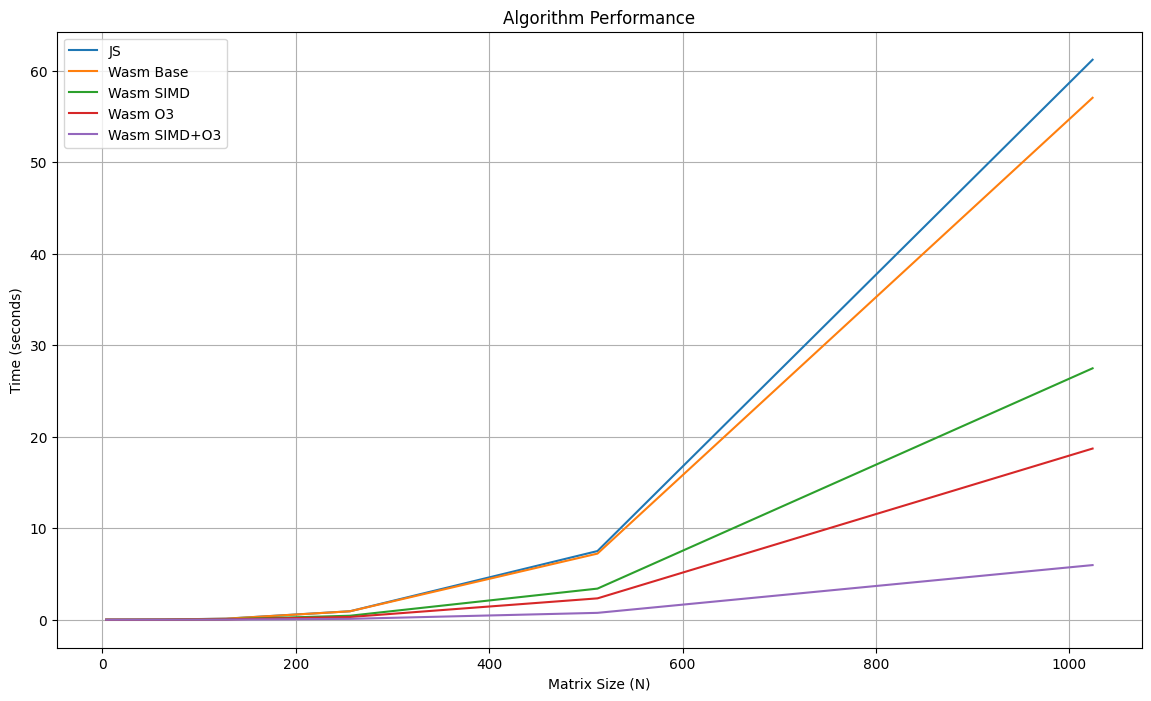

In [12]:
algo_data = {}
for (algo, N), result in results.items():
    # if algo == 'JS':
    #     continue
    if algo not in algo_data:
        algo_data[algo] = {'N': [], 'time': []}
    algo_data[algo]['N'].append(N)
    algo_data[algo]['time'].append(float(result))

# Plot
plt.figure(figsize=(14, 8))
for algo, data in algo_data.items():
    plt.plot(data['N'], data['time'], label=algo)

plt.xlabel('Matrix Size (N)')
plt.ylabel('Time (seconds)')
plt.title('Algorithm Performance')
plt.legend()
plt.grid(True)
# plt.xticks(range(len(mtx_sizes)), [str(i) for i in mtx_sizes])
plt.savefig("results.png")
plt.show()